# Creating a Neural Netowork
In this class, I will learn how to create a Neural network. In order to do that, I will be using the Kera's Fashion DataSet, it contains 60,000 pictures (28x28) of clothes for training and 10,000 pictures for testing. At the end, my neural network should be able to classify the clothe part by a picture.

About the input: Every pixel of the picture is going to be analyzed by a specific neuron, which means I am going to use 784 neurons on the input layer. OBS: The pixels may vary from 0 to 255, the higher the number is, it is closer to white.

In [14]:
# Importing:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Getting the Dataset:
fashion_mnist = keras.datasets.fashion_mnist # Loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Splitting into Training and testing

In [16]:
# Creating the labels:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

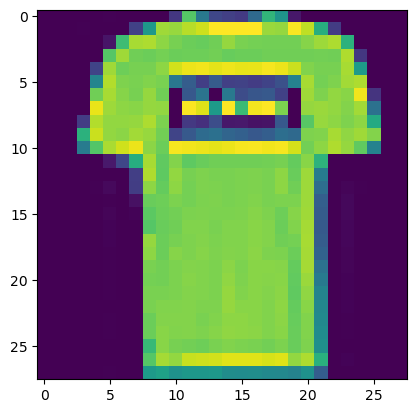

In [17]:
# Looking the inputs we have:
plt.figure()
plt.imshow(train_images[1])
plt.grid(False)
plt.show()

# Data preprocessing:
Since every pixel can vary between 0 and 255, a good practice is to preprocess the data. This means, to decrease the values so the mathematics may be easier, requiring less computational power.

In [18]:
train_images = train_images / 255.0 
test_images = test_images / 255.0
#.0 to guarantee the value will be float
# This preprocess step guarantee that every pixel is between 0 and 1

In [19]:
# Building the model:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Tells how many neurons on the input layer. (Obs: Every image is flattened)
    keras.layers.Dense(128, activation='relu'), # Tells how many neurons on the hidden layer and their activation function
    keras.layers.Dense(10, activation='softmax') # Tells how many neurons on the output layer and the AF.
])

In [20]:
# Compiling the model:
model.compile(optimizer='adam', # The gradient descent
              loss='sparse_categorical_crossentropy', # The loss function. This is the best for classification problems.
                                                        # Use the Loss function for linear regression problems.
              metrics=['accuracy'] #The metric to monitore the performance of the model
              )


In [21]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4983 - accuracy: 0.8252
Epoch 2/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3732 - accuracy: 0.8650


In [22]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) #Verbose is how many information is printed

print('Test Accuracy: ', test_acc*100)

313/313 [==============================] - 0s 794us/step - loss: 0.3988 - accuracy: 0.8590
Test Accuracy:  85.9000027179718


313/313 [==============================] - 0s 692us/step


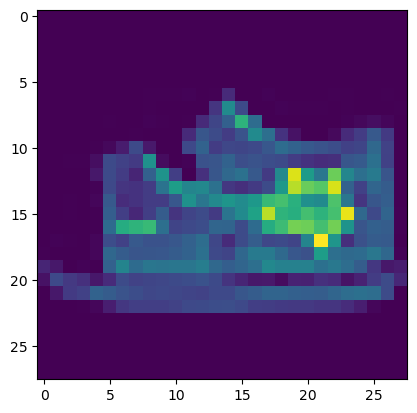

 Sandal 


In [23]:
# Making predictions:
predictions = model.predict(test_images)

# Showing the item that is been predicted
plt.figure()
plt.imshow(test_images[9999])
plt.show()

# Printing the prediction:
print('\033[32m', class_names[np.argmax(predictions[9999])], '\033[0m')